# 1. Load the training data

In [80]:
import pandas as pd

train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
train_data.shape

(1460, 81)

In [82]:
# Check which Column have how many missing values
missing = train_data.isna().sum()
missing[missing>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

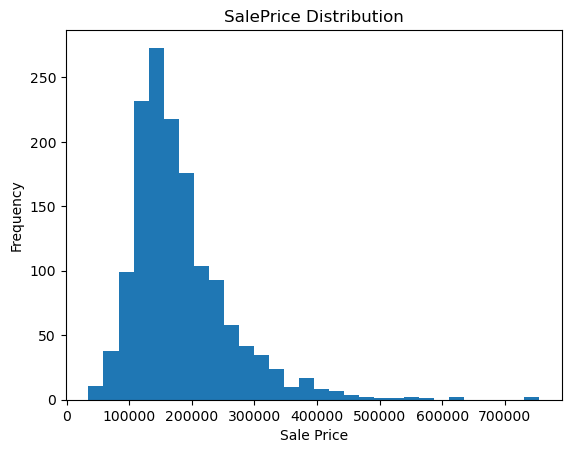

In [83]:
# To check column is Skewed or not visually.
import matplotlib.pyplot as plt

plt.hist(train_data["SalePrice"], bins=30);
plt.title("SalePrice Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Frequency");

In [84]:
import numpy as np
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

In [85]:
train_data["SalePrice"].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

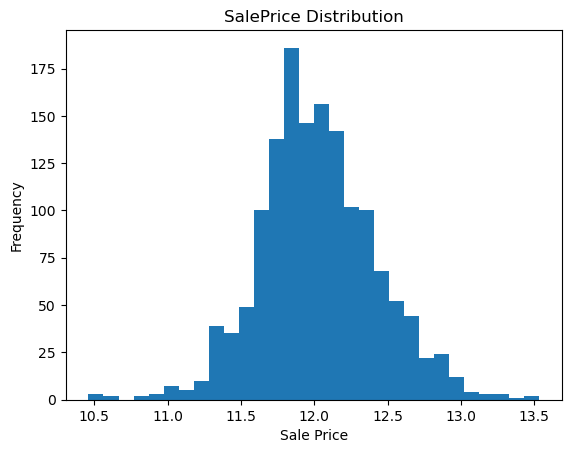

In [86]:
plt.hist(train_data["SalePrice"], bins=30);
plt.title("SalePrice Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Frequency");

In [87]:
# Training Data (We have test.csv for testing. But before final testing we can do validation testing)
from sklearn.model_selection import train_test_split

x = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"]

np.random.seed(42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [88]:
# Check which Column have how many missing values
missing = x_train.isna().sum()
missing[missing>0]

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

# 2. Getting the training data ready (Preprocessing)

2.1 Drop the columns have large amount of missing values

In [89]:
# # Drop high missing values columns
x_train.drop("Alley", axis=1, inplace=True)
x_val.drop("Alley", axis=1, inplace=True)

x_train.drop("MasVnrType", axis=1, inplace=True)
x_val.drop("MasVnrType", axis=1, inplace=True)

x_train.drop("FireplaceQu", axis=1, inplace=True)
x_val.drop("FireplaceQu", axis=1, inplace=True)

x_train.drop("PoolQC", axis=1, inplace=True)
x_val.drop("PoolQC", axis=1, inplace=True)

x_train.drop("Fence", axis=1, inplace=True)
x_val.drop("Fence", axis=1, inplace=True)

x_train.drop("MiscFeature", axis=1, inplace=True)
x_val.drop("MiscFeature", axis=1, inplace=True)

2.2 Fill null values in categorical columns with their mode

In [90]:
# Select categorical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns
categorical_columns = list(categorical_columns)


# Fill null values in categorical columns with their mode
for col in categorical_columns:
    x_train.fillna({col: x_train[col].mode()[0]}, inplace=True)
    x_val.fillna({col: x_val[col].mode()[0]}, inplace=True)

2.3 Fill missing values in numerical colunms with their mean

In [91]:
# Select Numerical columns
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical colunms with their mean
for col in numerical_columns:
    x_train.fillna({col:x_train[col].mean()}, inplace=True)
    x_val.fillna({col:x_val[col].mean()}, inplace=True)

In [92]:
# Check which Column have how many missing values
missing = x_train.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [93]:
# Check which Column have how many missing values
missing = x_val.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [94]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [95]:
missing_in_val = set(x_val.columns) - set(x_train.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [96]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,40,0,0,0,0,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,164,0,0,0,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,264,0,0,0,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,242,0,0,0,0,5,2010,WD,Normal


# 3. One Hot Encoding

In [97]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(handle_unknown="ignore") # Fit and score the modeloder(handle_unknown="ignore")

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_columns)],
                               remainder="passthrough")
x_train_encoded = transformer.fit_transform(x_train) 
x_val_encoded = transformer.transform(x_val)

# 4. Feature Scaling (Standardization)

In [98]:
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(x_train_encoded)
X_val = scaler.transform(x_val_encoded)

# 5. Fit the model/algorithm and use it to make predictions on our data.

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_scaled, y_train)

LinearRegression()

In [100]:
model.score(X_scaled, y_train)

0.9435680496382124

In [101]:
model.score(X_val, y_val)

0.9157787690565746

In [102]:
y_pred = model.predict(X_val)

# 6. Evaluating the Model

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Evaluate model using evaluation functions
print("Regression matrics on the validation data")
print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"mae: {mean_absolute_error(y_val, y_pred)}")
print(f"mse: {mean_squared_error(y_val, y_pred)}")
print(f"Logirithmic MSE: {root_mean_squared_error(np.log(y_val), np.log(y_pred))}")

Regression matrics on the validation data
R2 score: 0.9157787690565746
mae: 0.08849666768747107
mse: 0.01571660716653771
Logirithmic MSE: 0.010645095994499748


# 7. Load the test data

In [104]:
x_test = pd.read_csv("test.csv")
x_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [105]:
x_test.shape

(1459, 80)

In [106]:
# Check which Column have how many missing values
missing = x_test.isna().sum()
missing[missing>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

# 8. Getting the test data ready (Preprocessing)

8.1 Drop the columns have large amount of missing values

In [107]:
# # Drop high missing values columns
x_test.drop("Alley", axis=1, inplace=True)

x_test.drop("MasVnrType", axis=1, inplace=True)

x_test.drop("FireplaceQu", axis=1, inplace=True)

x_test.drop("PoolQC", axis=1, inplace=True)

x_test.drop("Fence", axis=1, inplace=True)

x_test.drop("MiscFeature", axis=1, inplace=True)

In [108]:
missing_in_val = set(x_train.columns) - set(x_test.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [109]:
missing_in_val = set(x_test.columns) - set(x_train.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


8.2 Fill null values in categorical columns with their mode

In [110]:
# Select categorical columns
categorical_columns = x_test.select_dtypes(include=['object']).columns
categorical_columns = list(categorical_columns)


# Fill null values in categorical columns with their mode
for col in categorical_columns:
    x_test.fillna({col: x_test[col].mode()[0]}, inplace=True)

8.3 Fill missing values in numerical colunms with their mean

In [111]:
# Select Numerical columns
numerical_columns = x_test.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical colunms with their mean
for col in numerical_columns:
    x_test.fillna({col:x_test[col].mean()}, inplace=True)

In [112]:
# Check which Column have how many missing values
missing = x_test.isna().sum()
missing[missing>0]

Series([], dtype: int64)

# 9. One Hot Encoding

In [113]:
# One Hot Encoding on test data

x_test_encoded = transformer.transform(x_test)

# 10. Feature Scaling (Standardization)

In [114]:
X_test_scale = scaler.transform(x_test_encoded)

# 11. Prediction

In [115]:
y_pred = model.predict(X_test_scale)

In [116]:
y_pred[:10]

array([11.71510918, 11.96881514, 12.11550557, 12.19654571, 12.20023703,
       12.05572286, 12.13078632, 11.99694565, 12.17666082, 11.70799667])

# 12. Save the model

In [117]:
import joblib

joblib.dump(model, "housing_price_model.pkl")

['housing_price_model.pkl']

# By using pipeline

In [118]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("train.csv")
data.dropna(subset=["SalePrice"], inplace=True)


# Define different features and transformation pipeline

# Columns to drop
drop_features = ["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]


# for categorical data
categorical_features = data.select_dtypes(include=["object"]).columns

# check if column is in drop column list
categorical_features = [col for col in categorical_features if col not in drop_features
                       ]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])



# for numerical data
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns
numerical_features = numerical_features[:-1]

# Check if column is in drop column list
numerical_features = [col for col in numerical_features if col not in drop_features]

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler(with_mean=False))
])


# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("drop", "drop", drop_features),
    ("cat", categorical_transformer, categorical_features),
    ("num", numerical_transformer, numerical_features)
])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split into x and y
x = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['Alley', 'MasVnrType',
                                                   'FireplaceQu', 'PoolQC',
                                                   'Fence', 'MiscFeature']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'Lan...
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF', ...])])),
                ('model', LinearRegression())])

In [119]:
model.score(x_test, y_test)

0.8851591781049678

# Import  test data

In [120]:
test_data = pd.read_csv("test.csv")

In [121]:
y_pred = model.predict(test_data)
y_pred[:10]

array([117400.01150606, 165826.84523942, 188112.00578846, 199253.38869813,
       209218.97293404, 172863.45601323, 186363.39014228, 159489.26152726,
       207038.89070698, 116729.43550783])